# <center>Eligibility of loan prediction using Decision Tree and Ensemble Methods</center>

## Problem Description
A company wants to automate its loan approval process and reduce the workload of manual loan assessments. We have collected a dataset of loan applications, including various factors such as personal and financial information of the applicants. Our goal is to build a binary classification model to predict whether an applicant is eligible for a loan or not by predicting if he//she will be defaulted on loan or not, so we can create a model that can accurately predict loan eligibility and reduce the number of loan applications that need to be manually reviewed.

To achieve our goal, we have decided to use a decision tree as a base model and explore the use of ensemble methods like Random Forest and AdaBoost to improve the performance of the model. We want to compare the performance of these models and identify the best approach to predict loan eligibility.

## Description of the Dataset
This [dataset](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior) belongs to a Hackathon organized by **"Univ.AI"!!**
This dataset contains information regarding the people who are eligible for loans or not. It includes features like income, age, profession, experience, etc. All the features are listed below.

**Number of instances:** 280000\
**Number of features:** 11 **Input Features** and 1 **Target Feature**(Risk_Flag)

### Attribute Information:
The detail information of each attribute is listed as:

* **Income** - Income of the user.
* **Age** - Age of the user.
* **Experience** - Professional experience of the user in years.
* **Married/Single** - Whether married or single.
* **House_Ownership** - Owned or rented or neither.
* **Car_Ownership** - Does a person own a car.
* **Profession** - Profession.
* **City** - City of Residence.
* **State** - State of Residence.
* **Current_Job_Yrs** - Years of experience in current job.
* **Current_House_Yrs** - Number of years in a current residence.
* **Risk_Flag** - Defaluted on a loan.

In our dataset, `Risk_Flag` is a target column. But the target column does not tell whether the individual is eligible for loan or not. It is true if the individual has defaulted on his or her loan.
Our job is to analyze the data and predict if a future individual will default on a loan or not.

## 1. Importing necessary Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn         
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from pickle import dump, load
import mlflow
import mlflow.sklearn
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset

In [2]:
training_data = pd.read_csv('./Datasets/Training Data.csv')
training_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
training_data.shape

(252000, 13)

In [4]:
test_data = pd.read_csv('./Datasets/Test Data.csv')
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
test_data.shape

(28000, 12)

In [6]:
sample_data = pd.read_csv('./Datasets/Sample Prediction Dataset.csv')
sample_data.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [7]:
sample_data.shape

(28000, 2)

### Merging the dataset
Since we have received our data in three different file, we can merge our data into a single file and work on it.

In [8]:
test_data.rename(columns = {'ID':'Id'}, inplace = True)
test_data['Risk_Flag']=sample_data['risk_flag']
dataset = pd.concat([training_data, test_data], axis = 0, )

In [9]:
dataset.drop(['Id'], axis = 1, inplace = True)
dataset.insert(0, "Id", np.arange(0,280000))
dataset.set_index('Id', inplace=True)

In [10]:
dataset['Profession'] = dataset['Profession'].apply(lambda x: x.replace(' ', '_'))
dataset['CITY'] = dataset['CITY'].apply(lambda x: x.replace(' ', '_'))
dataset['STATE'] = dataset['STATE'].apply(lambda x: x.replace(' ', '_'))

In [11]:
dataset.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [12]:
dataset.shape

(280000, 12)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280000 entries, 0 to 279999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             280000 non-null  int64 
 1   Age                280000 non-null  int64 
 2   Experience         280000 non-null  int64 
 3   Married/Single     280000 non-null  object
 4   House_Ownership    280000 non-null  object
 5   Car_Ownership      280000 non-null  object
 6   Profession         280000 non-null  object
 7   CITY               280000 non-null  object
 8   STATE              280000 non-null  object
 9   CURRENT_JOB_YRS    280000 non-null  int64 
 10  CURRENT_HOUSE_YRS  280000 non-null  int64 
 11  Risk_Flag          280000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 27.8+ MB


In [14]:
dataset.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.800000e+05,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000
mean,5.000361e+06,49.964132,10.088032,6.334418,11.997193,0.123532
std,2.876988e+06,17.070465,6.005066,3.646864,1.398907,0.329048
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.506726e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.003310e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Saving the file 
We can save our merged file for later use.

In [15]:
dataset.to_csv('./Datasets/Merged_Dataset.csv', index=False)

## 3. Exploratory Data Analysis (EDA) and Data preprocessing

Lets check how many are defaulted on loan(Risk_Flag = 1) and how many paid?

In [16]:
defaulted = dataset['Risk_Flag'].sum()
total = dataset.shape[0]
print(f'The rate of people who are defaulted is {defaulted/total *100:.2f}% and the rate of people who paid their loan is {(total-defaulted)/total*100:.2f}%.')

The rate of people who are defaulted is 12.35% and the rate of people who paid their loan is 87.65%.


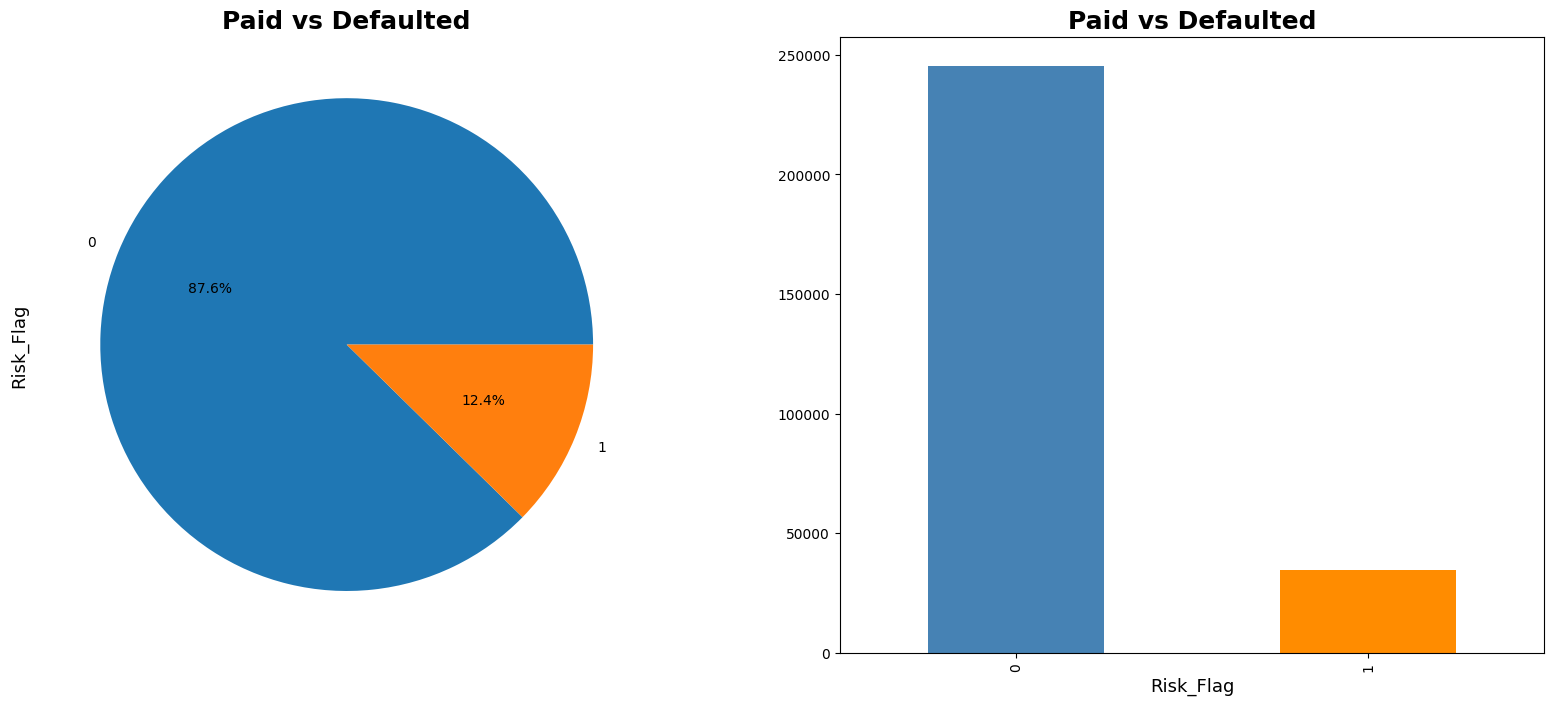

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows= 1, ncols= 2, figsize = (20,8))

dataset['Risk_Flag'].value_counts().plot.pie(autopct = "%1.1f%%", ax = ax0)
ax0.set_title('Paid vs Defaulted', fontsize = 18, fontweight = 'bold')
ax0.set_ylabel('Risk_Flag',fontsize = 13)

dataset['Risk_Flag'].value_counts().plot(kind = 'bar', ax = ax1, color = ['steelBlue', 'DarkOrange'])
ax1.set_title('Paid vs Defaulted', fontsize = 18, fontweight = 'bold')
ax1.set_xlabel('Risk_Flag', fontsize = 13);

From above we can see that our 12.4% are defaulted.

### Correlation Between Features
Lets check if there is any correlation between the features.

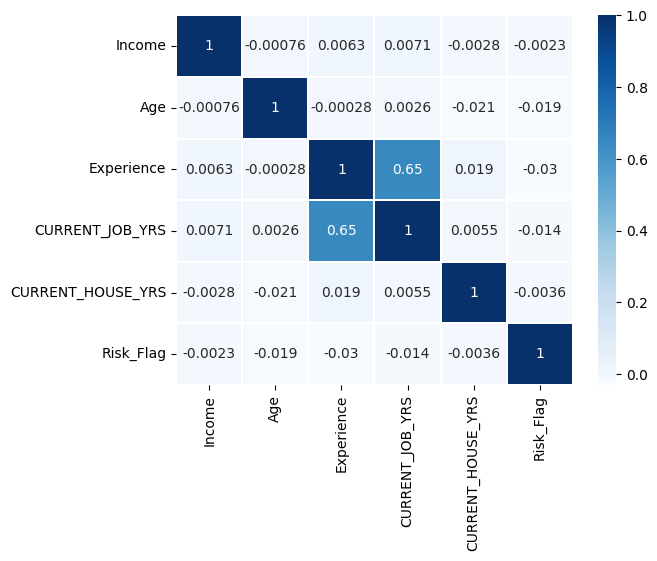

In [18]:
sns.heatmap(dataset.corr(), linewidths=0.2, annot=True, cmap = 'Blues');

From above heatmap, we can see that `CURRENT_JOB_YRS` and `Experiece` has positive correlation.
We can either merge two feature or remove either one of them. We are removing `Experience` feature beacuse to predict on present context, `CURRENT_JOB_YRS` is more important.

In [19]:
dataset = dataset.drop('Experience', axis = 1)

### Income

In [20]:
dataset['Income'].describe().astype('int64')

count     280000
mean     5000361
std      2876987
min        10310
25%      2506726
50%      5003310
75%      7477502
max      9999938
Name: Income, dtype: int64

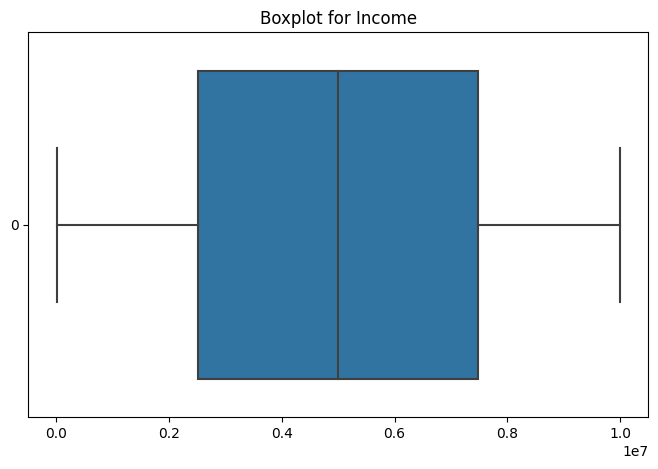

In [21]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(data = dataset['Income'], ax = ax, orient='h');
ax.set_title('Boxplot for Income');

There is no outlier in our `Income` column.

In [22]:
Income_range = pd.qcut(dataset['Income'], 4).unique()
Income_range

[(10309.999, 2506726.0], (7477502.0, 9999938.0], (2506726.0, 5003310.0], (5003310.0, 7477502.0]]
Categories (4, interval[float64, right]): [(10309.999, 2506726.0] < (2506726.0, 5003310.0] < (5003310.0, 7477502.0] < (7477502.0, 9999938.0]]

In [23]:
bins = [10309, 2506726, 5003310, 7477502, 9999938]
labels = [0,1,2,3]

dataset['Cat_Income'] = pd.cut(dataset['Income'], labels = labels, bins = bins).astype('int64')
dataset = dataset.drop('Income', axis = 1)

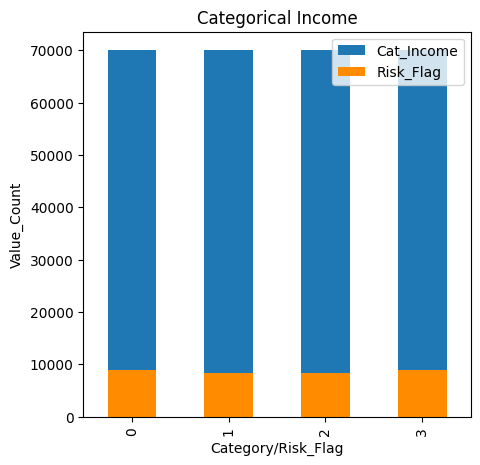

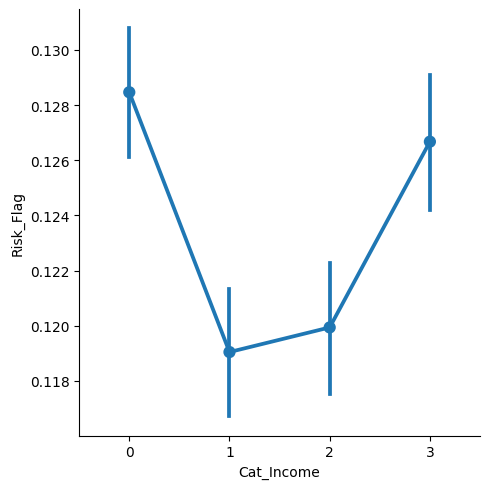

In [24]:
fig, ax = plt.subplots(figsize = (5,5))
dataset['Cat_Income'].value_counts(sort=False).plot.bar(ax = ax, label = 'Cat_Income')
dataset.groupby('Cat_Income')['Risk_Flag'].sum().plot.bar(ax = ax,color = 'DarkOrange', label = 'Risk_Flag')

ax.legend()
ax.set_title('Categorical Income')
ax.set_xlabel('Category/Risk_Flag')
ax.set_ylabel('Value_Count')

sns.catplot(x='Cat_Income', y = 'Risk_Flag', data = dataset, kind = 'point');

In [25]:
pd.crosstab(dataset['Cat_Income'], dataset['Risk_Flag'], margins=True)

Risk_Flag,0,1,All
Cat_Income,,,
0,61024,8995,70019
1,61671,8334,70005
2,61605,8396,70001
3,61111,8864,69975
All,245411,34589,280000


In [26]:
print(f'The rate of people defaulted on loan on each category with corresponding values are: ')
print(f'O : {8995/70019*100:.2f}% (8995)')
print(f'1 : {8334/70005*100:.2f}% (8334)')
print(f'2 : {8396/70001*100:.2f}% (8396)')
print(f'3 : {8864/69975*100:.2f}% (8864)')

The rate of people defaulted on loan on each category with corresponding values are: 
O : 12.85% (8995)
1 : 11.90% (8334)
2 : 11.99% (8396)
3 : 12.67% (8864)


From the above, we can conclude that the "category 0" has a greater chance of defaulting on its loan. However, people with high incomes are also not repaying their loans, raising the possibility of fraud.
There are also other factors we have to check before reaching this conclusion.

In [27]:
dataset.isna().sum()

Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Cat_Income           0
dtype: int64

### Age

In [28]:
dataset['Age'].describe()

count    280000.000000
mean         49.964132
std          17.070465
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64

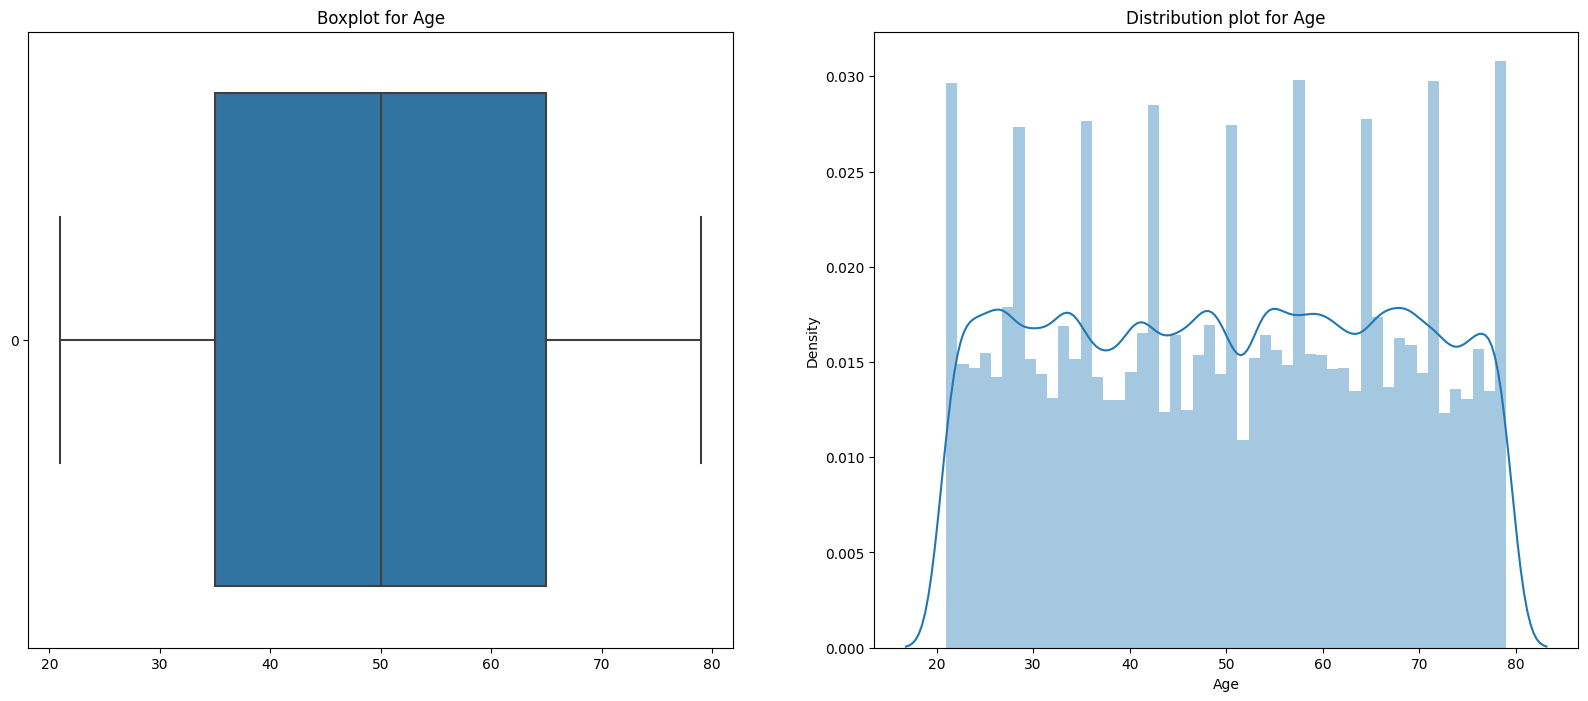

In [29]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols= 2, figsize = (20,8))
sns.boxplot(data = dataset['Age'], ax = ax0, orient='h')
sns.distplot(dataset['Age'], ax = ax1)

ax0.set_title('Boxplot for Age');
ax1.set_title('Distribution plot for Age');

There is no outlier in `Age`. There is no outlier in this age. And the age groups are almost uniformly distributed.
Lets change our age group into smaller categorical group.

In [30]:
Age_range = pd.qcut(dataset['Age'], 5).unique()
Age_range

[(20.999, 32.0], (32.0, 44.0], (56.0, 68.0], (44.0, 56.0], (68.0, 79.0]]
Categories (5, interval[float64, right]): [(20.999, 32.0] < (32.0, 44.0] < (44.0, 56.0] < (56.0, 68.0] < (68.0, 79.0]]

In [31]:
bins = [20,32,44,56,68,79]
labels = [0,1,2,3,4]

dataset['Cat_Age'] = pd.cut(dataset['Age'], labels = labels, bins = bins).astype('int64')
dataset = dataset.drop('Age', axis = 1)

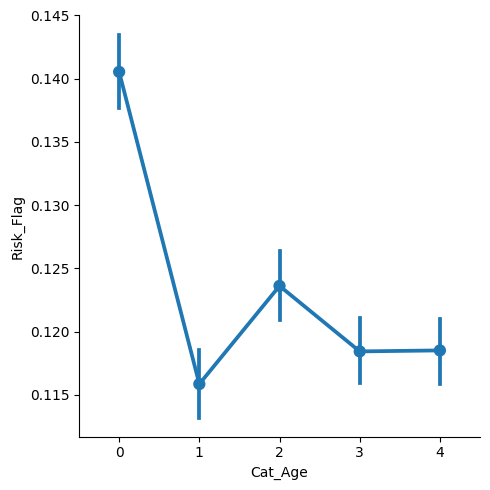

In [32]:
sns.catplot(x='Cat_Age', y = 'Risk_Flag', data = dataset, kind = 'point');

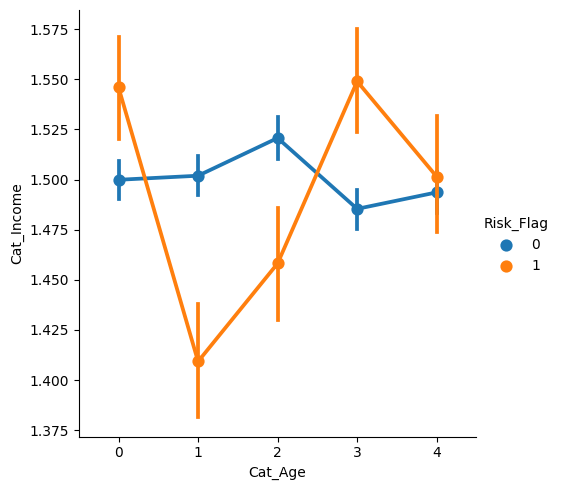

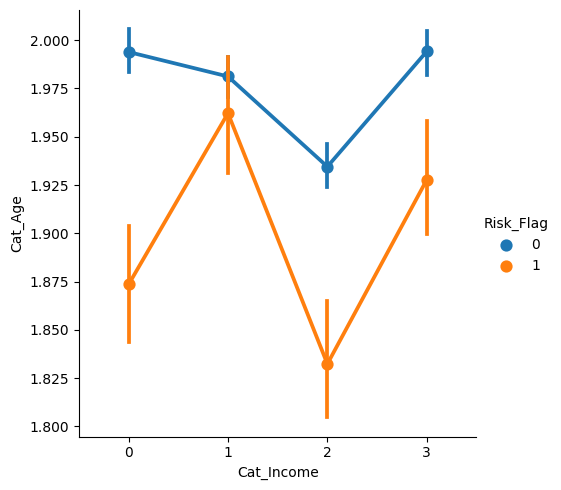

In [33]:
sns.catplot(data = dataset, x = 'Cat_Age', y = 'Cat_Income',hue = 'Risk_Flag', kind='point')
sns.catplot(data = dataset, x = 'Cat_Income', y = 'Cat_Age',hue = 'Risk_Flag', kind='point');

From the above graph, we can conclude that the age groups in the lower category are more risky to give loans to.

### Married/Single

In [34]:
dataset['Married/Single'].value_counts()

single     251442
married     28558
Name: Married/Single, dtype: int64

In [35]:
pd.crosstab(dataset['Married/Single'], dataset['Risk_Flag'], margins=True)

Risk_Flag,0,1,All
Married/Single,,,
married,25548,3010,28558
single,219863,31579,251442
All,245411,34589,280000


In [36]:
print(f'The rate of people defaulted on loan on each category with corresponding values are: ')
print(f'Married : {3010/28558*100:.2f}% (3010)')
print(f'Single : {31579/251442*100:.2f}% (31579)')

The rate of people defaulted on loan on each category with corresponding values are: 
Married : 10.54% (3010)
Single : 12.56% (31579)


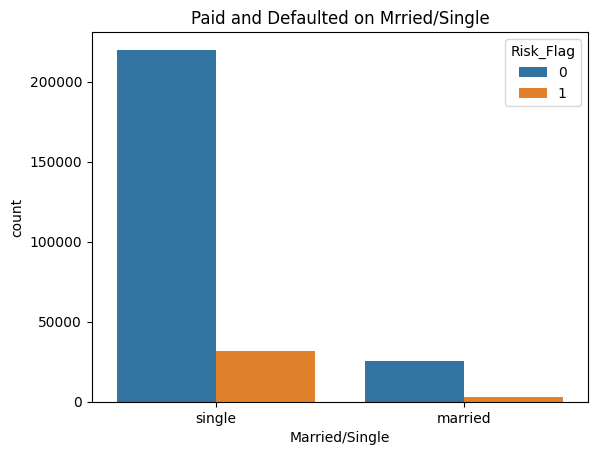

In [37]:
sns.countplot(data=dataset, x = 'Married/Single', hue = 'Risk_Flag').set(title = 'Paid and Defaulted on Mrried/Single');

From the above information, we can conclude that single people have more chances of defaulting on a loan.

### House_Ownership

In [38]:
dataset['House_Ownership'].value_counts()

rented          257703
owned            14348
norent_noown      7949
Name: House_Ownership, dtype: int64

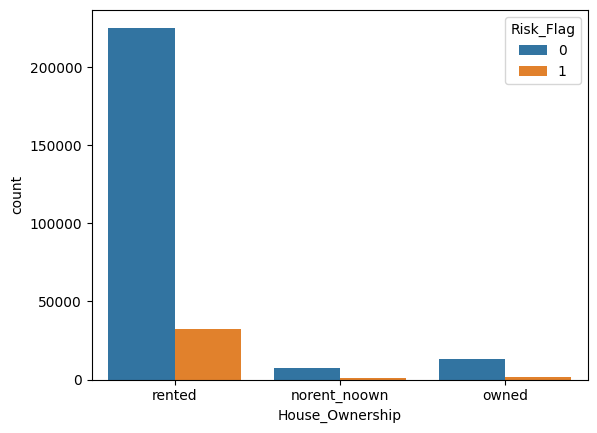

In [39]:
sns.countplot(data = dataset, x='House_Ownership', hue = 'Risk_Flag');

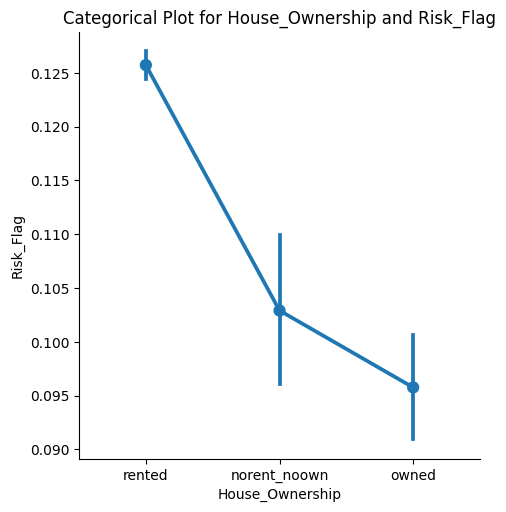

In [40]:
sns.catplot(x='House_Ownership', y = 'Risk_Flag', data = dataset, kind = 'point').set(title = 'Categorical Plot for House_Ownership and Risk_Flag');

From the above bar graph and categorical plot, people on rent tend to take more loans, and they are also highly likely to default.

### Car_Ownership

In [41]:
dataset['Car_Ownership'].value_counts()

no     195625
yes     84375
Name: Car_Ownership, dtype: int64

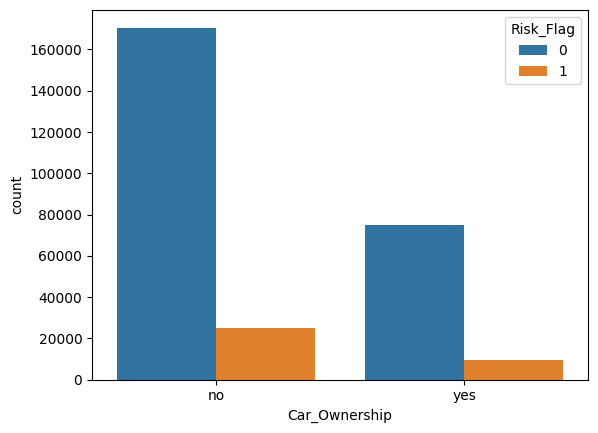

In [42]:
sns.countplot(data = dataset, x = 'Car_Ownership', hue = 'Risk_Flag');

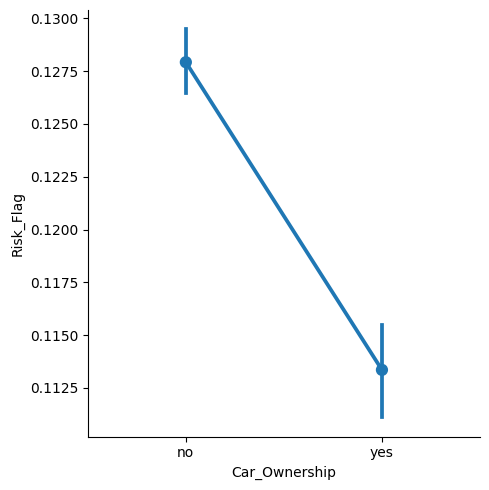

In [43]:
sns.catplot(data = dataset, x = 'Car_Ownership', y = 'Risk_Flag', kind='point');

We can see that the number of people who do not own a car is high, and they are also more likely to default on their loans.
Let's check for both car and house ownership to be clear.

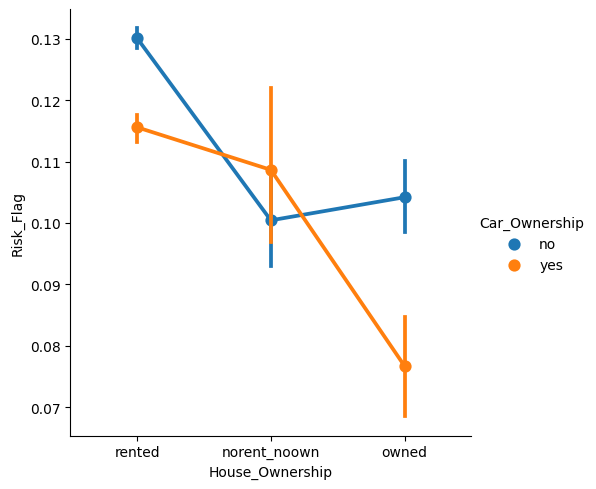

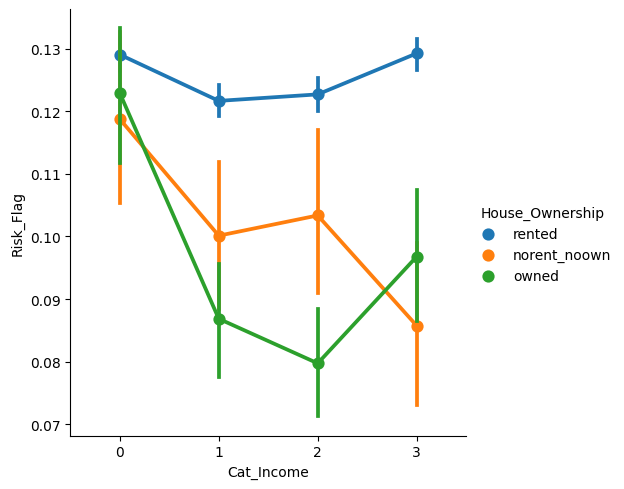

In [44]:
sns.catplot(data = dataset, x = 'House_Ownership', y = 'Risk_Flag',hue = 'Car_Ownership', kind='point')
sns.catplot(data = dataset, x = 'Cat_Income', y = 'Risk_Flag',hue = 'House_Ownership', kind='point');

From the above graph, we can conclude that rich people who own both a car and a house are less likely to default, and vice versa.

### Profession

In [45]:
print(f'The total number of unique professions in dataset is {len(dataset.Profession.unique())}.')

The total number of unique professions in dataset is 51.


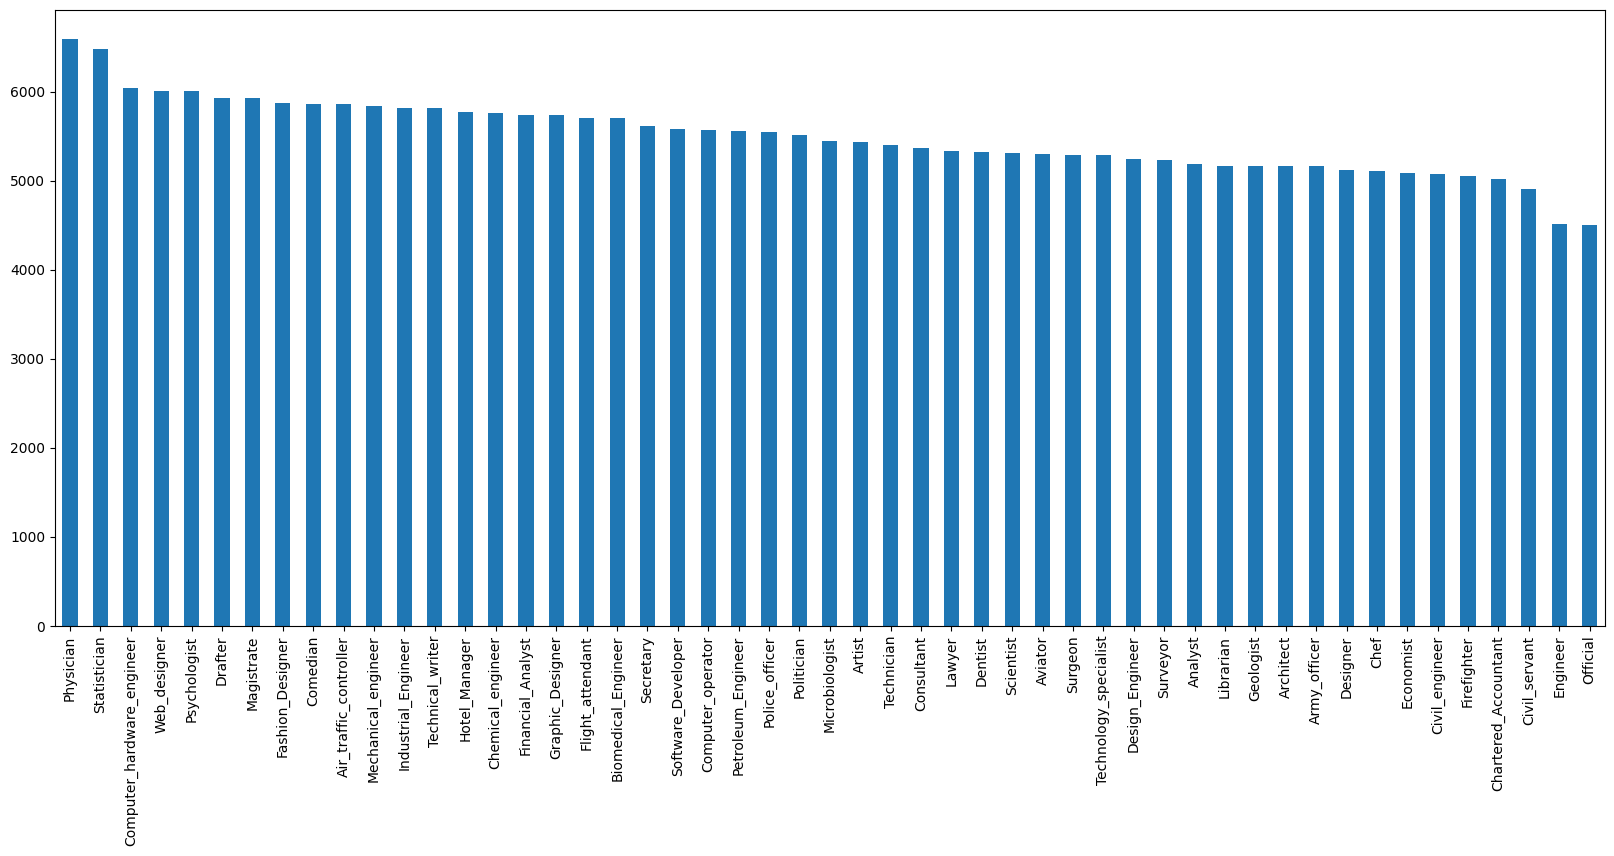

In [46]:
fig, ax = plt.subplots(figsize = (20,8))
dataset['Profession'].value_counts().plot.bar();

In [47]:
pd.crosstab(dataset['Profession'], dataset['Risk_Flag'], margins = True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
Profession,,,
All,245411,34589,280000
Police_officer,4655,896,5551
Software_Developer,4753,829,5582
Air_traffic_controller,5069,786,5855
Army_officer,4376,786,5162


From the above information, physicians apply for loans more than other professions, and police officers are the most likely to have defaulted on their loans.

### State (City)
Since we know cities are the subset of states, for the sake of simplicity, we are going to work on `STATE` and `CITY` at the same time.

In [48]:
pd.crosstab(dataset['STATE'], dataset['Risk_Flag'], margins=True)

Risk_Flag,0,1,All
STATE,,,
Andhra_Pradesh,24946,3308,28254
Assam,6795,1030,7825
Bihar,19199,2881,22080
Chandigarh,653,70,723
Chhattisgarh,3716,554,4270
Delhi,5404,650,6054
Gujarat,11178,1493,12671
Haryana,7648,1082,8730
Himachal_Pradesh,796,123,919


In [49]:
c = (pd.crosstab(dataset['STATE'], dataset['Risk_Flag'], margins=True)[1]/pd.crosstab(dataset['STATE'], dataset['Risk_Flag'], margins=True)['All']*100)
c.sort_values(ascending=False).head()

STATE
Manipur              20.588235
Tripura              16.573348
Kerala               16.522966
Jammu_and_Kashmir    15.435223
Madhya_Pradesh       15.190358
dtype: float64

In [50]:
(pd.crosstab(dataset['CITY'], dataset['Risk_Flag'], margins=True)[1]/pd.crosstab(dataset['CITY'], dataset['Risk_Flag'], margins=True)['All']*100).sort_values(ascending=False).head()

CITY
Bhubaneswar    29.868228
Gwalior        25.478645
Bettiah[33]    24.806202
Kochi          24.762808
Sikar          23.198198
dtype: float64

In [51]:
dataset['STATE'][dataset['CITY']=='Bhubaneswar'].unique()

array(['Odisha'], dtype=object)

In [52]:
c['Odisha']

13.947163947163945

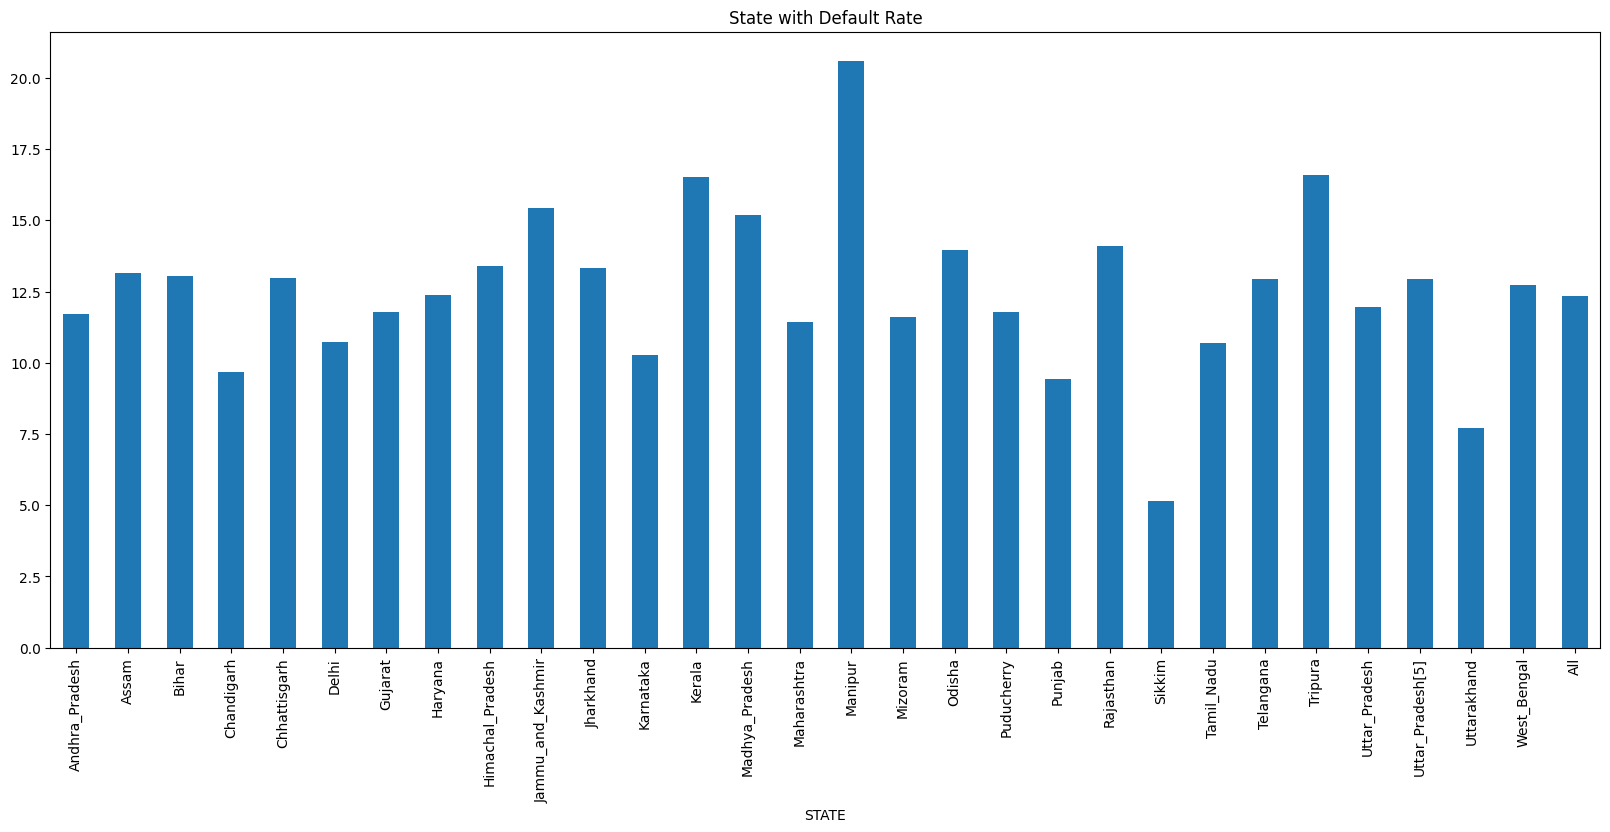

In [53]:
fig, ax = plt.subplots(figsize = (20,8))
c.plot.bar(ax = ax)
ax.set_title('State with Default Rate');

From the above calculation and plot, we have concluded:
* Manipur State has the highest default rate of 20.59%.
* Bhubaneswar city has the highest default rate of 29.87%.
* But Bhubaneswar city lies in the state of Odisha, which has a default rate of only 13.95%.

### Current Job Year

In [54]:
pd.crosstab(dataset['Risk_Flag'], dataset['CURRENT_JOB_YRS'])

CURRENT_JOB_YRS,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Risk_Flag,,,,,,,,,,,,,,,
0,10579,10881,10263,28913,27843,24544,22858,19594,18492,16949,15433,13117,10461,8732,6752
1,1713,1960,2069,3794,3599,3341,3210,2624,2438,2131,2106,2023,1255,1406,920


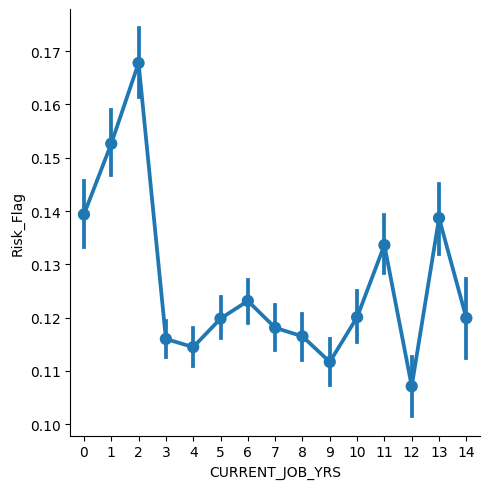

In [55]:
sns.catplot(data = dataset, x = 'CURRENT_JOB_YRS', y = 'Risk_Flag', kind = 'point');

From the above plot, we can say that when people just started working, they were not able to pay their loan and defaulted, but after a certain amount of time (3 years), many people were able to pay their loan and the default rate decreased.

### Current House Year

In [56]:
pd.crosstab(dataset['Risk_Flag'], dataset['CURRENT_HOUSE_YRS'])

CURRENT_HOUSE_YRS,10,11,12,13,14
Risk_Flag,,,,,
0,47350,50363,50633,49292,47773
1,6770,7229,7022,6928,6640


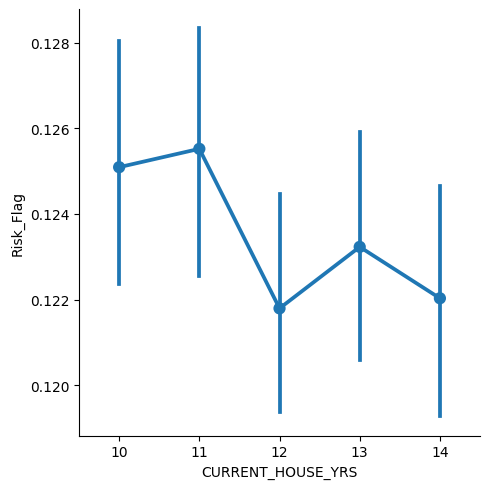

In [57]:
sns.catplot(data = dataset, x = 'CURRENT_HOUSE_YRS', y = 'Risk_Flag', kind = 'point');

From the above graph, we can conclude that loans are only given to those who have lived in the same residence for more than 10 years, and the default rate decreases as the number of `current house years` decreases.

### Converting categorical columns to numerical
We converted each categorical column to numerical column and also saved label encoder object for each feature for deploy part.

In [58]:
categorical_columns = [i for i in dataset.columns if dataset[i].dtype == 'object']

encoders = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(dataset[column])
    encoders[column] = encoder

dump(encoders, open('./Models/encoders.pkl', 'wb'))
    
for column in categorical_columns:
    label_encoder = encoders[column]
    dataset[column] = label_encoder.transform(dataset[column])

In [59]:
dataset.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Cat_Income,Cat_Age
Id,,,,,,,,,,,
0,1,2,0,33,251,13,3,13,0,0,0
1,1,2,0,43,227,14,9,13,0,3,1
2,0,2,0,47,8,12,4,10,0,1,3
3,1,2,1,43,54,17,2,12,1,2,1
4,1,2,0,11,296,22,3,14,1,2,2


### Checking correlation of the final dataset

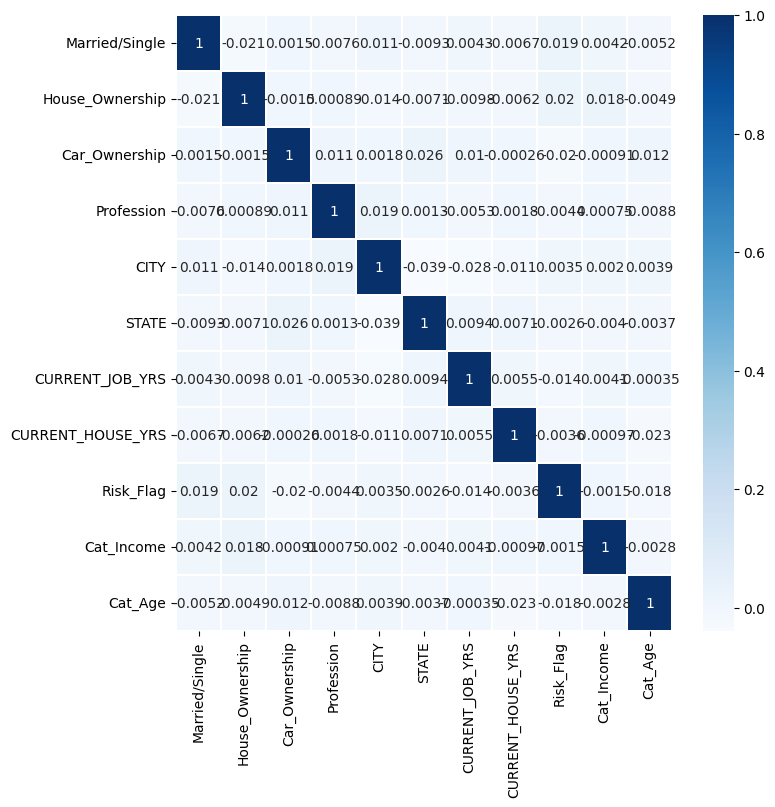

In [60]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(dataset.corr(), linewidths=0.2, cmap='Blues', annot=True, ax = ax);

There is no correlation between features in our dataset. We can now proceed to the next step. 

## 4. Balancing our dataset
As we've seen earlier, our dataset is not balanced. It contain only **12.4%** on defaulted and **87.4%** on not defaulted. 
Balancing a dataset is important to prevent biases and improve the overall accuracy and generalization ability of machine learning models.
There are different ways to handle imbalanced dataset:
* OverSampling
* UnderSampling
* Combination of Oversampling and undersampling
* Ensemble
* Batching

We are using combination of both oversampling and undersampling technique `(SMOTEENN)` to balance our dataset.
`SMOTEENN` is a method for balancing imbalanced datasets that combines the oversampling technique `SMOTE (Synthetic Minority Over-sampling Technique)` and the undersampling technique `Edited Nearest Neighbors (ENN)`.

In [17]:
X = dataset.drop('Risk_Flag', axis = 1)
y = dataset['Risk_Flag']

SMOTEENN = imblearn.combine.SMOTEENN()

print(f'Original dataset shape is {y.shape[0]}')

# X_res, y_res = SMOTEENN.fit_resample(X, y)

# X_res.to_csv('./Datasets/balanced_feature.csv', index=False)
# y_res.to_csv('./Datasets/balanced_target.csv', index=False)

X_res = pd.read_csv('./Datasets/balanced_feature.csv')
y_res = pd.read_csv('./Datasets/balanced_target.csv')

print(f'After undersample dataset shape is {y_res.shape[0]}')

After undersample dataset shape is 330830


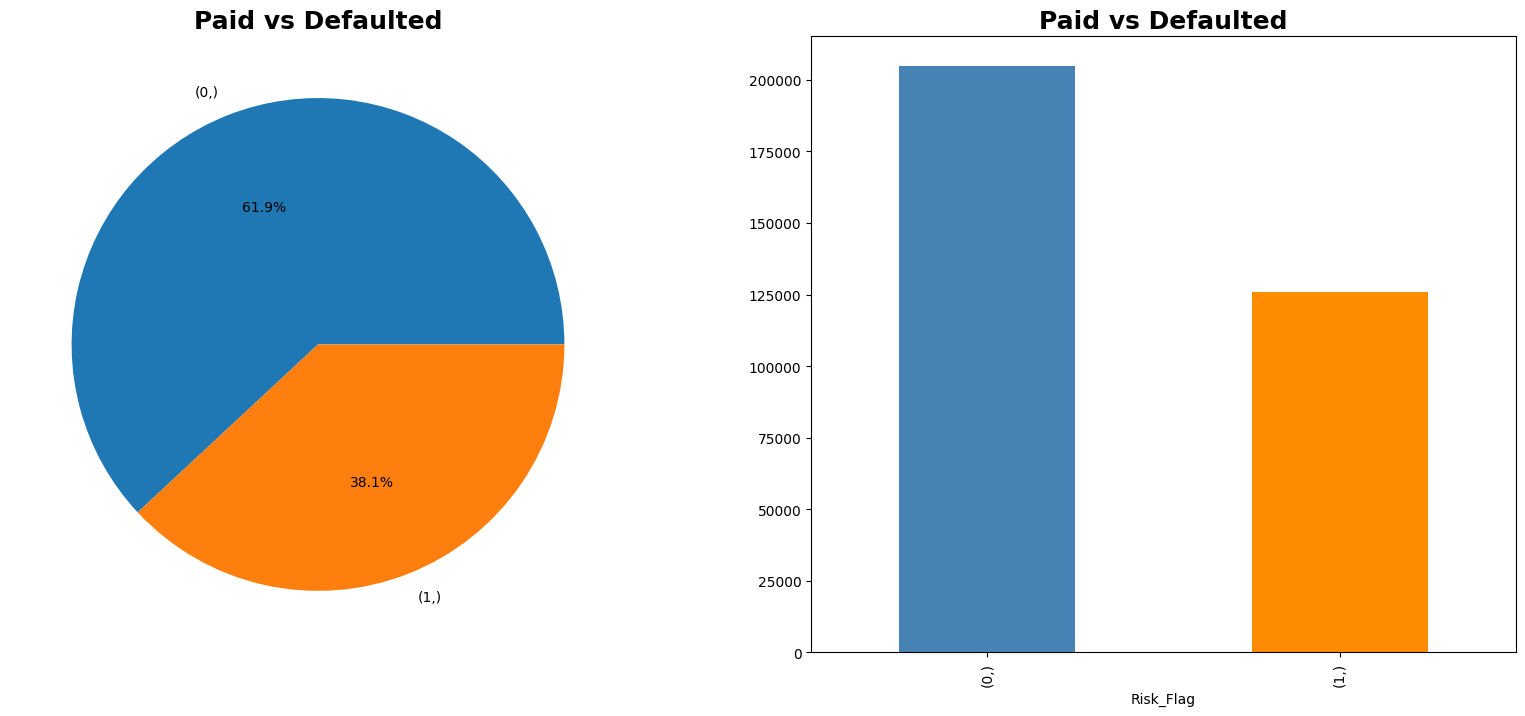

In [62]:
fig, (ax0, ax1) = plt.subplots(nrows= 1, ncols= 2, figsize = (20,8))

y_res.value_counts().plot.pie(autopct = "%1.1f%%", ax = ax0)
ax0.set_title('Paid vs Defaulted', fontsize = 18, fontweight = 'bold')
ax0.set_ylabel('',fontsize = 13)

y_res.value_counts().plot(kind = 'bar', ax = ax1, color = ['steelBlue', 'DarkOrange'])
ax1.set_title('Paid vs Defaulted', fontsize = 18, fontweight = 'bold');

Although our data is not balanced, we can work on it better than the previous dataset.

## 5. Model Training and Testing

Also, let's create function to evaluate the model.

In [18]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_preds labels on classification.
    """
    accuracy = metrics.accuracy_score(y_true, y_preds)
    precision = metrics.precision_score(y_true, y_preds)
    recall = metrics.recall_score(y_true, y_preds)
    f1 = metrics.f1_score(y_true, y_preds)
    metric_dict = {'accuracy':round(accuracy, 2),
                   'precision':round(precision, 2),
                   'recall':round(recall, 2),
                   'f1':round(f1, 2)}
    print(f'Accuracy : {accuracy * 100:.2f}%')
    print(f'Precision : {precision:.2f}')
    print(f'Recall : {recall:.2f}')
    print(f'F1 score : {f1:.2f}')
    
    return metric_dict

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

### 5.1. Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name="decisiontree"):
    decisiontree = DecisionTreeClassifier(random_state=10)
    decisiontree.fit(X_train, y_train)

    y_pred = decisiontree.predict(X_test)
    result = evaluate_preds(y_test, y_pred)

    cross_val_scores = cross_val_score(decisiontree, X_res, y_res, cv=5, scoring='accuracy')
    print(f'Cross-Validation score: {np.mean(cross_val_scores)*100:.2f}')
    
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(decisiontree, "model")
    mlflow.sklearn.save_model(decisiontree, "./Models/decisiontree")

Accuracy : 96.80%
Precision : 0.96
Recall : 0.96
F1 score : 0.96
Cross-Validation score: 95.64


In [66]:
print(f'The accuracy of Decision Tree on Train_set is {metrics.accuracy_score(y_train, decisiontree.predict(X_train))*100:.2f}%.')
print(f'The accuracy of Decision Tree on Test_set is {metrics.accuracy_score(y_test, decisiontree.predict(X_test))*100:.2f}%.')

The accuracy of Decision Tree on Train_set is 100.00%.
The accuracy of Decision Tree on Test_set is 96.80%.


### 5.2. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name="randomforest"):
    randomforest = RandomForestClassifier(random_state=10)
    randomforest.fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)
    result = evaluate_preds(y_test, y_pred);

    cross_val_scores = cross_val_score(randomforest, X_res, y_res, cv=5, scoring='accuracy')
    print(f'Cross-Validation score: {np.mean(cross_val_scores)*100:.2f}')
    
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(randomforest, "model")
    mlflow.sklearn.save_model(randomforest, "./Models/randomforest")

Accuracy : 97.47%
Precision : 0.96
Recall : 0.98
F1 score : 0.97
Cross-Validation score: 95.84


In [68]:
print(f'The accuracy of Random Forest on Train_set is {metrics.accuracy_score(y_train, randomforest.predict(X_train))*100:.2f}%.')
print(f'The accuracy of Random Forest on Test_set is {metrics.accuracy_score(y_test, randomforest.predict(X_test))*100:.2f}%.')

The accuracy of Random Forest on Train_set is 100.00%.
The accuracy of Random Forest on Test_set is 97.47%.


### 5.3. AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

with mlflow.start_run(run_name="adaboost"):
    adaboost = AdaBoostClassifier(random_state=10)
    adaboost.fit(X_train, y_train)

    y_pred = adaboost.predict(X_test)
    result = evaluate_preds(y_test, y_pred);

    cross_val_scores = cross_val_score(adaboost, X_res, y_res, cv=5, scoring='accuracy')
    print(f'Cross-Validation score: {np.mean(cross_val_scores)*100:.2f}')
    
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(adaboost, "model")
    mlflow.sklearn.save_model(adaboost, "./Models/adaboost")

Accuracy : 65.46%
Precision : 0.56
Recall : 0.42
F1 score : 0.48
Cross-Validation score: 65.79


In [70]:
print(f'The accuracy of Adaboost on Train_set is {metrics.accuracy_score(y_train, adaboost.predict(X_train))*100:.2f}%.')
print(f'The accuracy of Adaboost on Test_set is {metrics.accuracy_score(y_test, adaboost.predict(X_test))*100:.2f}%.')

The accuracy of Adaboost on Train_set is 65.80%.
The accuracy of Adaboost on Test_set is 65.46%.


### 5.4. Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

with mlflow.start_run(run_name="gradientboosting"):
    gradientboosting = GradientBoostingClassifier(random_state=10)
    gradientboosting.fit(X_train, y_train)

    y_pred = gradientboosting.predict(X_test)
    result = evaluate_preds(y_test, y_pred);

    cross_val_scores = cross_val_score(gradientboosting, X_res, y_res, cv=5, scoring='accuracy')
    print(f'Cross-Validation score: {np.mean(cross_val_scores)*100:.2f}')
    
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(gradientboosting, "model")
    mlflow.sklearn.save_model(gradientboosting, "./Models/gradientboosting")

Accuracy : 69.16%
Precision : 0.64
Recall : 0.44
F1 score : 0.52
Cross-Validation score: 69.43


In [72]:
print(f'The accuracy of Gradient Boosting on Train_set is {metrics.accuracy_score(y_train, gradientboosting.predict(X_train))*100:.2f}%.')
print(f'The accuracy of Gradient Boosting on Test_set is {metrics.accuracy_score(y_test, gradientboosting.predict(X_test))*100:.2f}%.')

The accuracy of Gradient Boosting on Train_set is 69.42%.
The accuracy of Gradient Boosting on Test_set is 69.16%.


### 5.5. XGBoost

In [73]:
from xgboost import XGBClassifier

with mlflow.start_run(run_name="xgb"):
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    result = evaluate_preds(y_test, y_pred);

    cross_val_scores = cross_val_score(xgb, X_res, y_res, cv=5, scoring='accuracy')
    print(f'Cross-Validation score: {np.mean(cross_val_scores)*100:.2f}')
    
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(xgb, "model")
    mlflow.sklearn.save_model(xgb, "./Models/xgb")

Accuracy : 89.72%
Precision : 0.93
Recall : 0.78
F1 score : 0.85
Cross-Validation score: 89.96


In [74]:
print(f'The accuracy of XGBoost on Train_set is {metrics.accuracy_score(y_train, xgb.predict(X_train))*100:.2f}%.')
print(f'The accuracy of XGboost on Test_set is {metrics.accuracy_score(y_test, xgb.predict(X_test))*100:.2f}%.')

The accuracy of XGBoost on Train_set is 90.30%.
The accuracy of XGboost on Test_set is 89.72%.


From the above 5 models, we found that Decision Tree and RandomForest is working good but they seems to be overfitting. AdaBoost and Gradient Boosting is not giving the good result. XGBoost is giving a good result but with a less recall. 

## 6. Hyperparameter Tuning
The next step is to hyperparameter tuning. We can hyperparameter tune two models from above: Random Forest and XGBoost.

**Hyperparameter tuning Random Forest**

In [78]:
grid = {
    'n_estimators': [50, 80, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5]
}


with mlflow.start_run(run_name="final_randomforest"):
    gd = GridSearchCV(estimator=randomforest, param_grid=grid, cv = 5, verbose=2)
    gd.fit(X_train, y_train)
    best_param = gd.best_params_
    print(best_param)
    
    final_randomforest = gd.best_estimator_
    y_pred = final_randomforest.predict(X_test)

    result = evaluate_preds(y_test, y_pred);
    
    for param in best_param:
        mlflow.log_param(param, best_param[param])
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(final_randomforest, "model")
    mlflow.sklearn.save_model(final_randomforest, "./Models/final_randomforest")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  10.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  10.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  10.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=80; total time=  16.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=80; total time=  17.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=80; total time=  15.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=80; total time=  16.0s
[CV] END max_depth=30, max_features=sqrt, min_s

[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=80; total time=  16.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=80; total time=  17.3s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=80; total time=  18.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=  21.3s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=  21.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=  21.9s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=  21.5s
[CV] END max_depth=40, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=  21.7s
[CV] END max_depth=40, max_features=log2, min_samples_split=2, n_estimators=50; total time=  10.6s
[CV] END max_depth=40, max_features=log2, min_samples_split=2, n_estimators=50; total time=  10.8s
[CV] 

[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50; total time=  10.2s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50; total time=  10.7s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50; total time=  10.8s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50; total time=  10.9s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50; total time=  10.3s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=80; total time=  17.3s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=80; total time=  17.2s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=80; total time=  16.9s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=80; total time=  16.6s
[CV] END max_depth=50, max_features=log2, min_samples_split=5, n_estimators=80; total time=  16.3s
[CV] END m

[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=80; total time=  16.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=80; total time=  17.0s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  20.9s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  20.6s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  21.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  20.3s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=  20.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=  11.0s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=  10.8s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=  10.9s
[CV] 

[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=50; total time=  11.0s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=50; total time=  11.0s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=50; total time=  11.4s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=50; total time=  11.9s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=80; total time=  20.5s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=80; total time=  19.2s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=80; total time=  17.9s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=80; total time=  17.9s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=80; total time=  17.2s
[CV] END max_depth=80, max_features=log2, min_samples_split=2, n_estimators=100; total time=  23.0s
[CV] END 

[CV] END max_depth=90, max_features=log2, min_samples_split=5, n_estimators=80; total time=  16.9s
[CV] END max_depth=90, max_features=log2, min_samples_split=5, n_estimators=100; total time=  20.4s
[CV] END max_depth=90, max_features=log2, min_samples_split=5, n_estimators=100; total time=  24.1s
[CV] END max_depth=90, max_features=log2, min_samples_split=5, n_estimators=100; total time=  20.5s
[CV] END max_depth=90, max_features=log2, min_samples_split=5, n_estimators=100; total time=  21.4s
[CV] END max_depth=90, max_features=log2, min_samples_split=5, n_estimators=100; total time=  22.4s
[CV] END max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  13.6s
[CV] END max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  10.7s
[CV] END max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  11.4s
[CV] END max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=  10.3s
[

In [80]:
print(f'The accuracy of final Final_Random_Forest on Train_set is {metrics.accuracy_score(y_train, final_randomforest.predict(X_train))*100:.2f}%.')
print(f'The accuracy of final Final_Random_Forest on Test_set is {metrics.accuracy_score(y_test, final_randomforest.predict(X_test))*100:.2f}%.')

The accuracy of final Final_Random_Forest on Train_set is 100.00%.
The accuracy of final Final_Random_Forest on Test_set is 97.48%.


**Hyperparameter tuning XGBoost**

In [80]:
grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1]
}

with mlflow.start_run(run_name="final_xgb"):
    gs = GridSearchCV(estimator=xgb, param_grid=grid, cv = 5, verbose=2, scoring='f1')
    gs.fit(X_train, y_train)
    best_param = gs.best_params_
    print(best_param)
    
    final_xgb = gs.best_estimator_
    y_pred = final_xgb.predict(X_test)

    result = evaluate_preds(y_test, y_pred);
    
    for param in best_param:
        mlflow.log_param(param, best_param[param])
    mlflow.log_metric("accuracy", result['accuracy'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("f1-score", result['f1'])
    mlflow.sklearn.log_model(final_xgb, "model")
    mlflow.sklearn.save_model(final_xgb, "./Models/final_xgb")

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_dep

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.7s


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.7s
[CV] 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   2.9s
[C

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.2s


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.6s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.3s
[CV] END c

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  13.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  13.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  13.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.8s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.1s
[CV] END co

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=  11.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total t

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  13.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  13.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  10.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.6; total time= 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time= 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total t

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.9s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; tot

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; tot

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.9s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.8s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.6; total time= 

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time= 

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.8s
[CV]

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.6s


[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.1s
[CV] EN

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.2s


[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.6; total time=  14.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.6; total time=  14.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.6; total time=  14.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.6; total time=  14.0s


[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.8s
[CV] END colsamp

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.1s
[CV] END

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsamp

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.2s
[CV] END

[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.5s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.8s


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] EN

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.3s


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV]

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.8s


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  11.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[C

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.0s
[CV] END

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.1s
[CV] END

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END c

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; tot

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total tim

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  16.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  16.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; tot

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   4

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.6; total time= 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time= 

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; tot

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total tim

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  16.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  16.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  16.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  16.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; tot

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=  12.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   3

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.6; total time= 

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time= 

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.6s


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.1s
[CV]

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  14.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.3s


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.5s
[CV] EN

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  11.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=  11.2s


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   8.8s
[CV] END

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.6; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.9s
[CV] END

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.6; total time=  15.4s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.1s


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] E

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.3s


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.1s
[CV] END 

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.1s
[CV] END 

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.2s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total t

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  13.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  13.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; tot

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=  

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total t

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; tot

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.6; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.6; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=  

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=

[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=  13.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   4.6s
[CV

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  13.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  12.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=  10.0s


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   3.1s
[CV] E

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.7s


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   4.1s
[CV] END

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   6.3s
[CV] END

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.6s
[CV] END colsamp

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=  17.2s
[CV] END

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsamp

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.5s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=  12.5s
[CV] END

In [81]:
print(f'The accuracy of final Final_XGBoost on Train_set is {metrics.accuracy_score(y_train, final_xgb.predict(X_train))*100:.2f}%.')
print(f'The accuracy of final Final_XGBoost on Test_set is {metrics.accuracy_score(y_test, final_xgb.predict(X_test))*100:.2f}%.')

The accuracy of final Final_XGBoost on Train_set is 98.42%.
The accuracy of final Final_XGBoost on Test_set is 96.89%.


## 6. Results

In [82]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.precision,metrics.accuracy,metrics.recall,metrics.f1-score,...,params.subsample,params.n_estimators,params.max_features,params.min_samples_split,params.random_state,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.user
0,f8c1523036c04b0d97d7f5b0d9da86ed,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 14:53:18.282000+00:00,2023-05-02 04:36:29.522000+00:00,0.97,0.97,0.94,0.96,...,0.6,200,None,None,None,final_xgb,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""f8c1523036c04b0d97d7f5b0d9da86ed""...",Nirajan
1,336845686cc240d4b6d4b39731b19569,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 12:40:55.508000+00:00,2023-05-01 14:53:10.449000+00:00,0.96,0.97,0.98,0.97,...,None,100,sqrt,2,None,final_randomforest,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""336845686cc240d4b6d4b39731b19569""...",Nirajan
2,e2e125ba56174c10ac06d75ccbf50ca8,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 07:35:42.960000+00:00,2023-05-01 07:36:18.960000+00:00,0.93,0.90,0.78,0.85,...,None,None,None,None,10,xgb,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""e2e125ba56174c10ac06d75ccbf50ca8""...",Nirajan
3,11689e456b234f2a9d00ab87b594836b,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 07:33:12.409000+00:00,2023-05-01 07:35:42.367000+00:00,0.64,0.69,0.44,0.52,...,None,None,None,None,10,gradientboosting,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""11689e456b234f2a9d00ab87b594836b""...",Nirajan
4,7bd52ac024314601bc05df7f310ee936,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 07:32:16.006000+00:00,2023-05-01 07:33:07.987000+00:00,0.56,0.65,0.42,0.48,...,None,None,None,None,10,adaboost,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""7bd52ac024314601bc05df7f310ee936""...",Nirajan
5,2d2a0ff840eb40ee9ba9de0124a6c44f,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 07:29:21.778000+00:00,2023-05-01 07:32:08.320000+00:00,0.96,0.97,0.98,0.97,...,None,None,None,None,10,randomforest,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""2d2a0ff840eb40ee9ba9de0124a6c44f""...",Nirajan
6,8132be0096f1461d81345baf4d678f22,0,FINISHED,file:///C:/Users/Nirajan/Desktop/Machine%20Lea...,2023-05-01 07:26:19.371000+00:00,2023-05-01 07:26:30.938000+00:00,0.96,0.97,0.96,0.96,...,None,None,None,None,10,decisiontree,LOCAL,C:\Users\Nirajan\AppData\Local\Programs\Python...,"[{""run_id"": ""8132be0096f1461d81345baf4d678f22""...",Nirajan


## 7. Final Model

Although the random forest model gave higher accuracy, it seemed like overfitting, so we chose the XGBoost model, which has less variance between the train set and the test set.

In [81]:
model_uri = 'runs:/f8c1523036c04b0d97d7f5b0d9da86ed/model'

model = mlflow.sklearn.load_model(model_uri = model_uri)

In [82]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 1.0,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.1,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [83]:
y_pred = model.predict(X_test)

evaluate_preds(y_test, y_pred);

Accuracy : 96.89%
Precision : 0.97
Recall : 0.94
F1 score : 0.96


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     40980
           1       0.97      0.94      0.96     25186

    accuracy                           0.97     66166
   macro avg       0.97      0.96      0.97     66166
weighted avg       0.97      0.97      0.97     66166



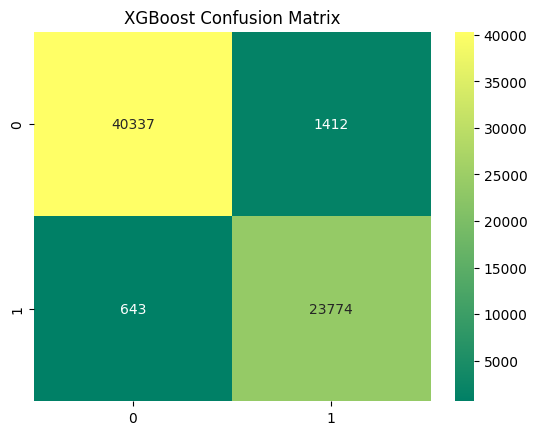

In [85]:
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='2.0f', cmap='summer').set(title="XGBoost Confusion Matrix");

## 7. Conclusion
From the above project, we trained our model using XGBoost algorithm with 96.9% accuracy. 

### Prediction

In [112]:
def getPredictions(martial, house_O, car_O, profession, city, state, current_jy, current_hy, income, age):
    model_uri = 'runs:/f8c1523036c04b0d97d7f5b0d9da86ed/model'

    model = mlflow.sklearn.load_model(model_uri = model_uri)
    encoders = load(open('./Models/encoders.pkl', 'rb'))

    categorical_data = [martial, house_O, car_O, profession, city, state]
    for i, j in enumerate(categorical_data):
        categorical_data[i] = [j]
    categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

    for i, column in enumerate(categorical_columns):
        label_encoder = encoders[column]
        categorical_data[i] = label_encoder.transform(categorical_data[i])
     
    categorical_data = np.squeeze(categorical_data)

    if income <= 2506726:
        income = 0
    elif 2506726 < income <= 5003310:
        income = 1
    elif 5003310 < income <=7477502:
        income = 2
    else:
        income = 3

    if age <= 32:
        age = 0
    elif 32 < age <= 44:
        age = 1
    elif 44 < age <= 56:
        age = 2
    elif 56 < age <= 68:
        age = 3
    else:
        age = 4   
        
    data = [[categorical_data[0], categorical_data[1], categorical_data[2], categorical_data[3], categorical_data[4], categorical_data[5], current_jy, current_hy, income, age]]
    df = pd.DataFrame(data , columns = model.feature_names_in_)
        
    prediction = model.predict(df)
    if prediction == 0:
        return 'eligible'
    elif prediction == 1:
        return 'not eligible'
    else:
        return 'error'

In [113]:
getPredictions('married', 'owned', 'no', 'Software_Developer', 'Kochi', 'Kerala', 3, 11, 3600000, 23)

'not eligible'

In [114]:
getPredictions('single', 'rented', 'no', 'Mechanical_engineer', 'Rewa', 'Madhya_Pradesh', 3, 13, 1303834, 23)

'eligible'